# LD Statistics Comparison: GPU vs CPU Implementation

This notebook compares LD statistics computed using GPU acceleration vs standard CPU implementation to verify correspondence and identify any discrepancies.

## Objectives:
1. Load LD statistics from both GPU and CPU implementations
2. Calculate Mean Squared Error (MSE) between corresponding statistics
3. Analyze differences by recombination bins
4. Generate comprehensive diagnostic plots
5. Assess overall correspondence between implementations

In [13]:
# Check what files actually exist and load the correct ones
import os
import glob
import pickle

# Check the split_isolation experiment directory structure
base_dir = "/sietch_colab/akapoor/Infer_Demography"
gpu_dir = f"{base_dir}/experiments/OOA_three_pop/inferences/sim_0/MomentsLD/LD_stats"
cpu_dir = f"{base_dir}/experiments/OOA_three_pop/inferences/sim_0/MomentsLD/traditional/LD_stats"

print("GPU directory exists:", os.path.exists(gpu_dir))
print("CPU directory exists:", os.path.exists(cpu_dir))

if os.path.exists(gpu_dir):
    gpu_files = glob.glob(f"{gpu_dir}/*.pkl")
    print(f"GPU files: {len(gpu_files)}")
    if gpu_files:
        print(f"First GPU file: {gpu_files[0]}")

if os.path.exists(cpu_dir):
    cpu_files = glob.glob(f"{cpu_dir}/*.pkl")
    print(f"CPU files: {len(cpu_files)}")
    if cpu_files:
        print(f"First CPU file: {cpu_files[0]}")

# Try to load the first available files
try:
    if gpu_files:
        with open(gpu_files[0], 'rb') as f:
            gpu_stats = pickle.load(f)
        print("✅ GPU stats loaded successfully")
        print(f"GPU stats type: {type(gpu_stats)}")
        if isinstance(gpu_stats, dict):
            print(f"GPU stats keys: {list(gpu_stats.keys())}")
    
    if cpu_files:
        with open(cpu_files[0], 'rb') as f:
            cpu_stats = pickle.load(f)
        print("✅ CPU stats loaded successfully") 
        print(f"CPU stats type: {type(cpu_stats)}")
        if isinstance(cpu_stats, dict):
            print(f"CPU stats keys: {list(cpu_stats.keys())}")
        elif isinstance(cpu_stats, (list, tuple, np.ndarray)):
            print(f"CPU stats shape/length: {len(cpu_stats) if hasattr(cpu_stats, '__len__') else 'N/A'}")
            
except Exception as e:
    print(f"Error loading files: {e}")

GPU directory exists: True
CPU directory exists: True
GPU files: 100
First GPU file: /sietch_colab/akapoor/Infer_Demography/experiments/OOA_three_pop/inferences/sim_0/MomentsLD/LD_stats/LD_stats_window_45.pkl
CPU files: 51
First CPU file: /sietch_colab/akapoor/Infer_Demography/experiments/OOA_three_pop/inferences/sim_0/MomentsLD/traditional/LD_stats/LD_stats_window_29.pkl
✅ GPU stats loaded successfully
GPU stats type: <class 'dict'>
GPU stats keys: ['bins', 'sums', 'stats', 'pops']
✅ CPU stats loaded successfully
CPU stats type: <class 'dict'>
CPU stats keys: ['bins', 'sums', 'stats', 'pops']


In [14]:
cpu_stats

{'bins': [(np.float64(0.0), np.float64(1e-06)),
  (np.float64(1e-06), np.float64(2e-06)),
  (np.float64(2e-06), np.float64(5e-06)),
  (np.float64(5e-06), np.float64(1e-05)),
  (np.float64(1e-05), np.float64(2e-05)),
  (np.float64(2e-05), np.float64(5e-05)),
  (np.float64(5e-05), np.float64(0.0001)),
  (np.float64(0.0001), np.float64(0.0002)),
  (np.float64(0.0002), np.float64(0.0005)),
  (np.float64(0.0005), np.float64(0.001))],
 'sums': [array([  7.68869048,   1.62978395,   1.39898148,  18.07876984,
          12.5612963 ,  17.15763889,  10.16706349,   1.75333333,
           1.48979167,  10.96154321,  10.90511111,  11.70314815,
          36.2004321 ,   6.25534722,   6.50497222,  15.12996032,
          17.83944444,  38.64685185,  22.84314815,   4.81308333,
           3.90798611,  13.54907407,   8.84548611,  13.70486111,
          17.06106151,  39.026875  ,  38.99231771,  22.55074074,
          22.73081944,  17.52435185, 129.1185571 , 129.87586111,
          70.37113715,  70.28731597,  5

In [15]:
gpu_stats

{'bins': [(np.float64(0.0), np.float64(1e-06)),
  (np.float64(1e-06), np.float64(2e-06)),
  (np.float64(2e-06), np.float64(5e-06)),
  (np.float64(5e-06), np.float64(1e-05)),
  (np.float64(1e-05), np.float64(2e-05)),
  (np.float64(2e-05), np.float64(5e-05)),
  (np.float64(5e-05), np.float64(0.0001)),
  (np.float64(0.0001), np.float64(0.0002)),
  (np.float64(0.0002), np.float64(0.0005)),
  (np.float64(0.0005), np.float64(0.001))],
 'sums': [array([  9.82662539,   1.85304017,   1.32267313,  15.90600275,
          11.38027008,  14.9748538 ,   8.18911249,  -1.60983918,
          -2.51      ,   8.71020776,   8.04010526,  10.70036011,
          20.51547091,   1.00729532,   2.31497368,  14.89704162,
          11.55156433,  30.35707756,  17.7116759 ,   1.62560526,
           2.68662281,  15.77234072,   6.42729532,  15.61432749,
          18.66697626,  38.67076023,  39.58690789,  21.26557479,
          22.71763816,  17.71961565, 126.76054017, 125.02000493,
          62.23880117,  67.45641283,  5

In [16]:
# Examine the data structure in more detail
print("=== CPU STATS STRUCTURE ===")
print(f"Type: {type(cpu_stats)}")
print(f"Keys: {list(cpu_stats.keys())}")

print(f"\nBins: {cpu_stats['bins']}")
print(f"Stats: {cpu_stats['stats']}")
print(f"Pops: {cpu_stats['pops']}")

print(f"\nSums structure:")
print(f"Type: {type(cpu_stats['sums'])}")
print(f"Length: {len(cpu_stats['sums'])}")

# Check the shape of each sum array
for i, sum_array in enumerate(cpu_stats['sums']):
    print(f"  sums[{i}]: shape={sum_array.shape}, dtype={sum_array.dtype}")
    if i < 3:  # Show first few values
        print(f"    First 5 values: {sum_array[:5]}")

print(f"\n=== GPU STATS STRUCTURE ===") 
print(f"Type: {type(gpu_stats)}")
print(f"Keys: {list(gpu_stats.keys())}")

print(f"\nBins: {gpu_stats['bins']}")
print(f"Stats: {gpu_stats['stats']}")  
print(f"Pops: {gpu_stats['pops']}")

print(f"\nSums structure:")
print(f"Type: {type(gpu_stats['sums'])}")
print(f"Length: {len(gpu_stats['sums'])}")

# Check the shape of each sum array
for i, sum_array in enumerate(gpu_stats['sums']):
    print(f"  sums[{i}]: shape={sum_array.shape}, dtype={sum_array.dtype}")
    if i < 3:  # Show first few values
        print(f"    First 5 values: {sum_array[:5]}")

=== CPU STATS STRUCTURE ===
Type: <class 'dict'>
Keys: ['bins', 'sums', 'stats', 'pops']

Bins: [(np.float64(0.0), np.float64(1e-06)), (np.float64(1e-06), np.float64(2e-06)), (np.float64(2e-06), np.float64(5e-06)), (np.float64(5e-06), np.float64(1e-05)), (np.float64(1e-05), np.float64(2e-05)), (np.float64(2e-05), np.float64(5e-05)), (np.float64(5e-05), np.float64(0.0001)), (np.float64(0.0001), np.float64(0.0002)), (np.float64(0.0002), np.float64(0.0005)), (np.float64(0.0005), np.float64(0.001))]
Stats: (['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2', 'DD_2_2', 'Dz_0_0_0', 'Dz_0_0_1', 'Dz_0_0_2', 'Dz_0_1_1', 'Dz_0_1_2', 'Dz_0_2_2', 'Dz_1_0_0', 'Dz_1_0_1', 'Dz_1_0_2', 'Dz_1_1_1', 'Dz_1_1_2', 'Dz_1_2_2', 'Dz_2_0_0', 'Dz_2_0_1', 'Dz_2_0_2', 'Dz_2_1_1', 'Dz_2_1_2', 'Dz_2_2_2', 'pi2_0_0_0_0', 'pi2_0_0_0_1', 'pi2_0_0_0_2', 'pi2_0_0_1_1', 'pi2_0_0_1_2', 'pi2_0_0_2_2', 'pi2_0_1_0_1', 'pi2_0_1_0_2', 'pi2_0_1_1_1', 'pi2_0_1_1_2', 'pi2_0_1_2_2', 'pi2_0_2_0_2', 'pi2_0_2_1_1', 'pi2_0_2_1_2', 'pi2

CPU has 11 sum arrays, 2 stat groups
GPU has 11 sum arrays, 2 stat groups
CPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
GPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
Found 51 matching statistics
First few matches: ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']
Found 11 arrays with matching shapes for comparison
Creating 8 comparison plots for - Single Window

Array 0 ((45,)):
  MSE: 1.96e+01
  MAE: 3.27e+00
  Max abs diff: 1.57e+01
  Correlation: 0.995118

Array 1 ((45,)):
  MSE: 1.22e+01
  MAE: 2.48e+00
  Max abs diff: 9.10e+00
  Correlation: 0.994637

Array 2 ((45,)):
  MSE: 6.43e+01
  MAE: 5.62e+00
  Max abs diff: 2.18e+01
  Correlation: 0.997151

Array 3 ((45,)):
  MSE: 1.88e+02
  MAE: 1.04e+01
  Max abs diff: 3.42e+01
  Correlation: 0.996595

Array 4 ((45,)):
  MSE: 4.50e+02
  MAE: 1.47e+01
  Max abs diff: 7.08e+01
  Correlation: 0.998077

Array 5 ((45,)):
  MSE: 2.68e+03
  MAE: 3.82e+01
  Max abs diff: 1.46e+02
  Corre

CPU has 11 sum arrays, 2 stat groups
GPU has 11 sum arrays, 2 stat groups
CPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
GPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
Found 51 matching statistics
First few matches: ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']
Found 11 arrays with matching shapes for comparison
Creating 8 comparison plots for - Single Window

Array 0 ((45,)):
  MSE: 1.96e+01
  MAE: 3.27e+00
  Max abs diff: 1.57e+01
  Correlation: 0.995118

Array 1 ((45,)):
  MSE: 1.22e+01
  MAE: 2.48e+00
  Max abs diff: 9.10e+00
  Correlation: 0.994637

Array 2 ((45,)):
  MSE: 6.43e+01
  MAE: 5.62e+00
  Max abs diff: 2.18e+01
  Correlation: 0.997151

Array 3 ((45,)):
  MSE: 1.88e+02
  MAE: 1.04e+01
  Max abs diff: 3.42e+01
  Correlation: 0.996595

Array 4 ((45,)):
  MSE: 4.50e+02
  MAE: 1.47e+01
  Max abs diff: 7.08e+01
  Correlation: 0.998077

Array 5 ((45,)):
  MSE: 2.68e+03
  MAE: 3.82e+01
  Max abs diff: 1.46e+02
  Corre

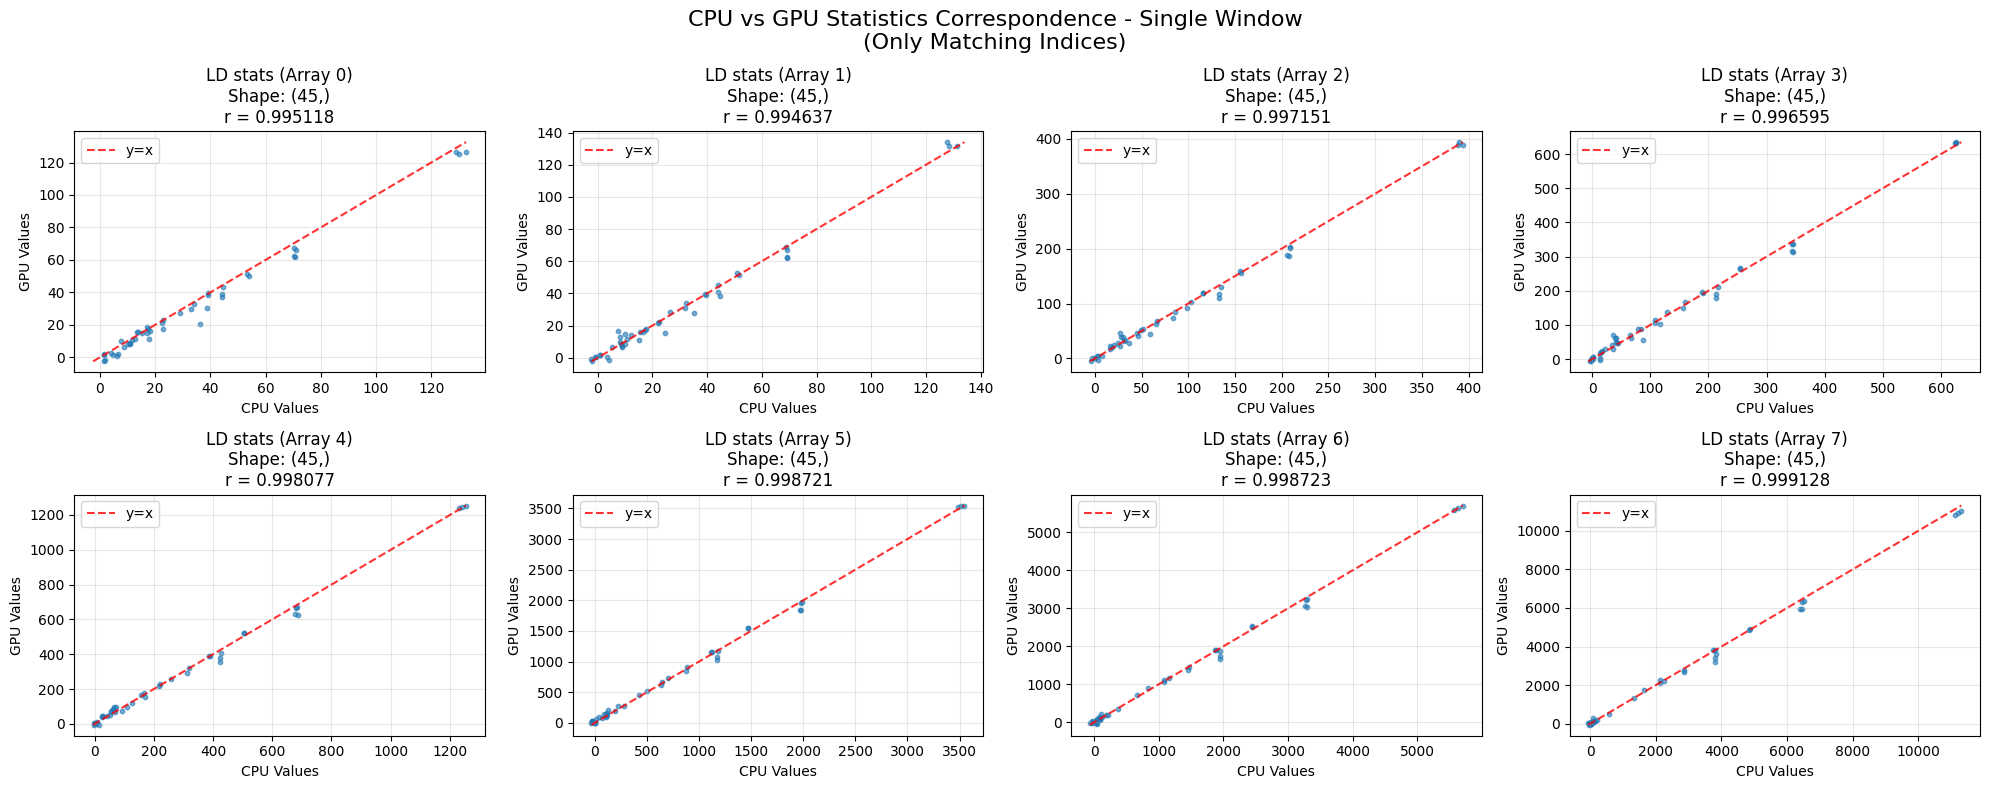

CPU has 11 sum arrays, 2 stat groups
GPU has 11 sum arrays, 2 stat groups
CPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
GPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
Found 51 matching statistics
First few matches: ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']
Found 11 arrays with matching shapes for comparison
Creating 8 comparison plots for - Single Window

Array 0 ((45,)):
  MSE: 1.96e+01
  MAE: 3.27e+00
  Max abs diff: 1.57e+01
  Correlation: 0.995118

Array 1 ((45,)):
  MSE: 1.22e+01
  MAE: 2.48e+00
  Max abs diff: 9.10e+00
  Correlation: 0.994637

Array 2 ((45,)):
  MSE: 6.43e+01
  MAE: 5.62e+00
  Max abs diff: 2.18e+01
  Correlation: 0.997151

Array 3 ((45,)):
  MSE: 1.88e+02
  MAE: 1.04e+01
  Max abs diff: 3.42e+01
  Correlation: 0.996595

Array 4 ((45,)):
  MSE: 4.50e+02
  MAE: 1.47e+01
  Max abs diff: 7.08e+01
  Correlation: 0.998077

Array 5 ((45,)):
  MSE: 2.68e+03
  MAE: 3.82e+01
  Max abs diff: 1.46e+02
  Corre

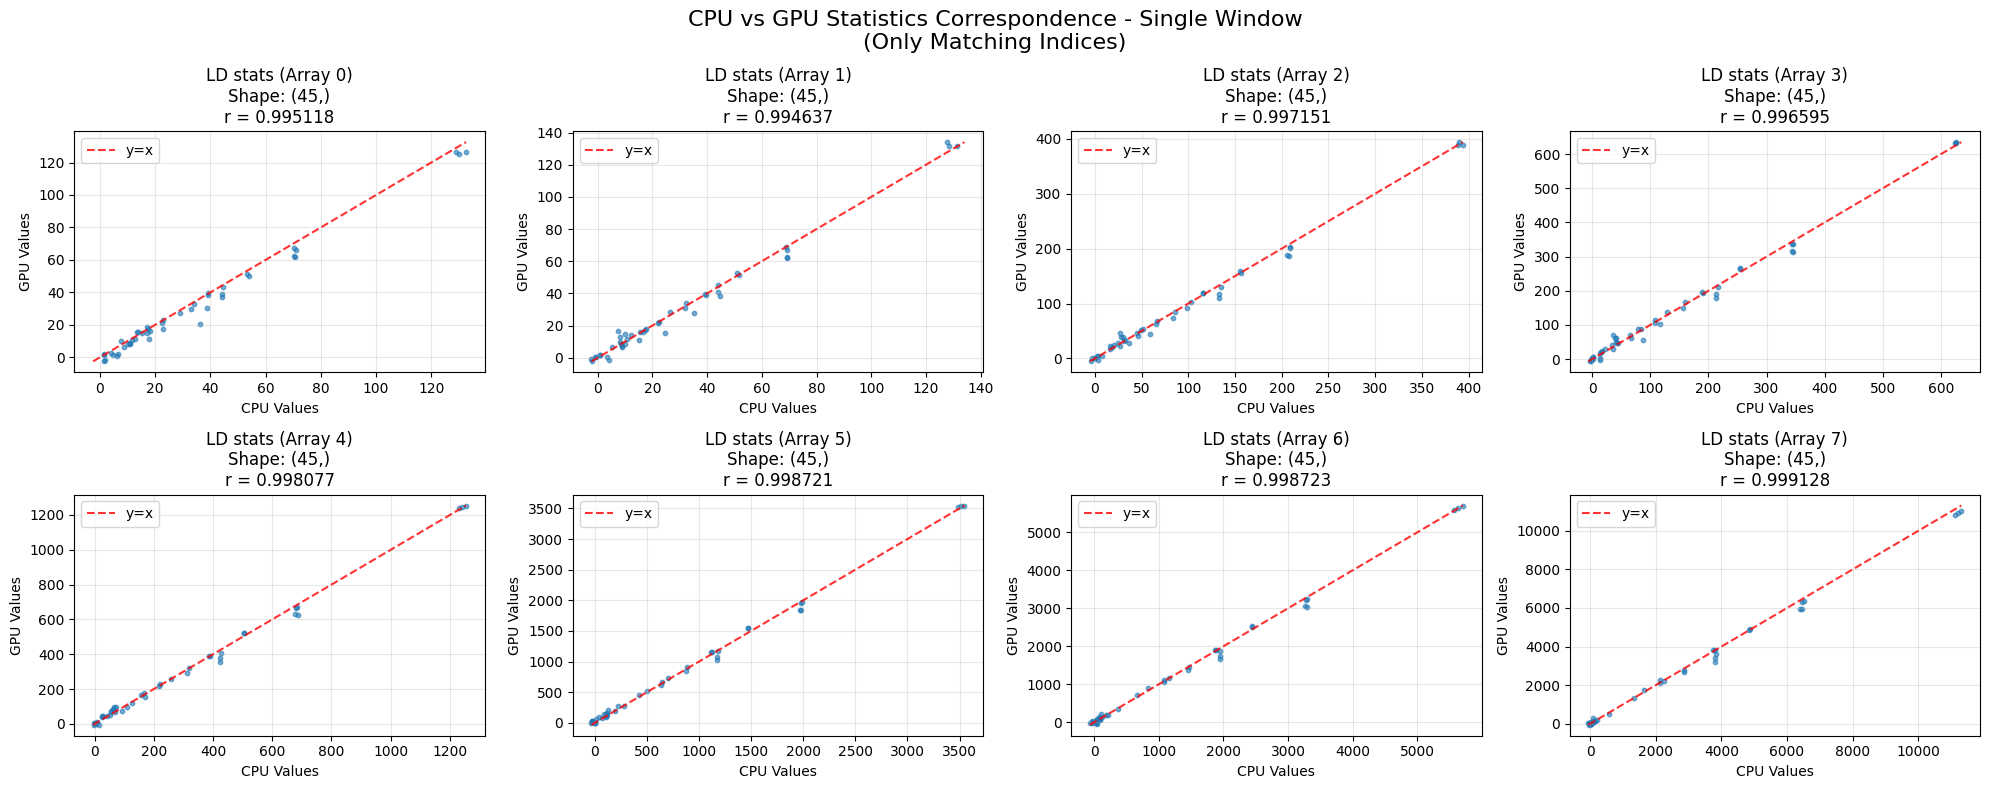


=== SINGLE WINDOW SUMMARY (MATCHING INDICES ONLY) ===
Overall correlation: 0.99936783
Overall MSE: 5.64e+04
Overall MAE: 8.22e+01
Total data points: 456
=== LOADING AND COMPARING 51 WINDOWS (MATCHING INDICES ONLY) ===
Window 0: correlation = 0.999974, 456 data points
Window 4: correlation = 0.999974, 456 data points
Window 6: correlation = 0.999981, 456 data points
Window 8: correlation = 0.999986, 456 data points
Window 9: correlation = 0.999984, 456 data points
Window 10: correlation = 0.999980, 456 data points
Window 13: correlation = 0.999984, 456 data points
Window 14: correlation = 0.999978, 456 data points
Window 19: correlation = 0.999985, 456 data points
Window 21: correlation = 0.999985, 456 data points
Window 24: correlation = 0.999994, 456 data points
Window 25: correlation = 0.999967, 456 data points
Window 28: correlation = 0.999987, 456 data points
Window 29: correlation = 0.999989, 456 data points
Window 30: correlation = 0.999978, 456 data points
Window 33: correlatio

CPU has 11 sum arrays, 2 stat groups
GPU has 11 sum arrays, 2 stat groups
CPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
GPU statistics (51): ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']...
Found 51 matching statistics
First few matches: ['DD_0_0', 'DD_0_1', 'DD_0_2', 'DD_1_1', 'DD_1_2']
Found 11 arrays with matching shapes for comparison
Creating 8 comparison plots for - Single Window

Array 0 ((45,)):
  MSE: 1.96e+01
  MAE: 3.27e+00
  Max abs diff: 1.57e+01
  Correlation: 0.995118

Array 1 ((45,)):
  MSE: 1.22e+01
  MAE: 2.48e+00
  Max abs diff: 9.10e+00
  Correlation: 0.994637

Array 2 ((45,)):
  MSE: 6.43e+01
  MAE: 5.62e+00
  Max abs diff: 2.18e+01
  Correlation: 0.997151

Array 3 ((45,)):
  MSE: 1.88e+02
  MAE: 1.04e+01
  Max abs diff: 3.42e+01
  Correlation: 0.996595

Array 4 ((45,)):
  MSE: 4.50e+02
  MAE: 1.47e+01
  Max abs diff: 7.08e+01
  Correlation: 0.998077

Array 5 ((45,)):
  MSE: 2.68e+03
  MAE: 3.82e+01
  Max abs diff: 1.46e+02
  Corre

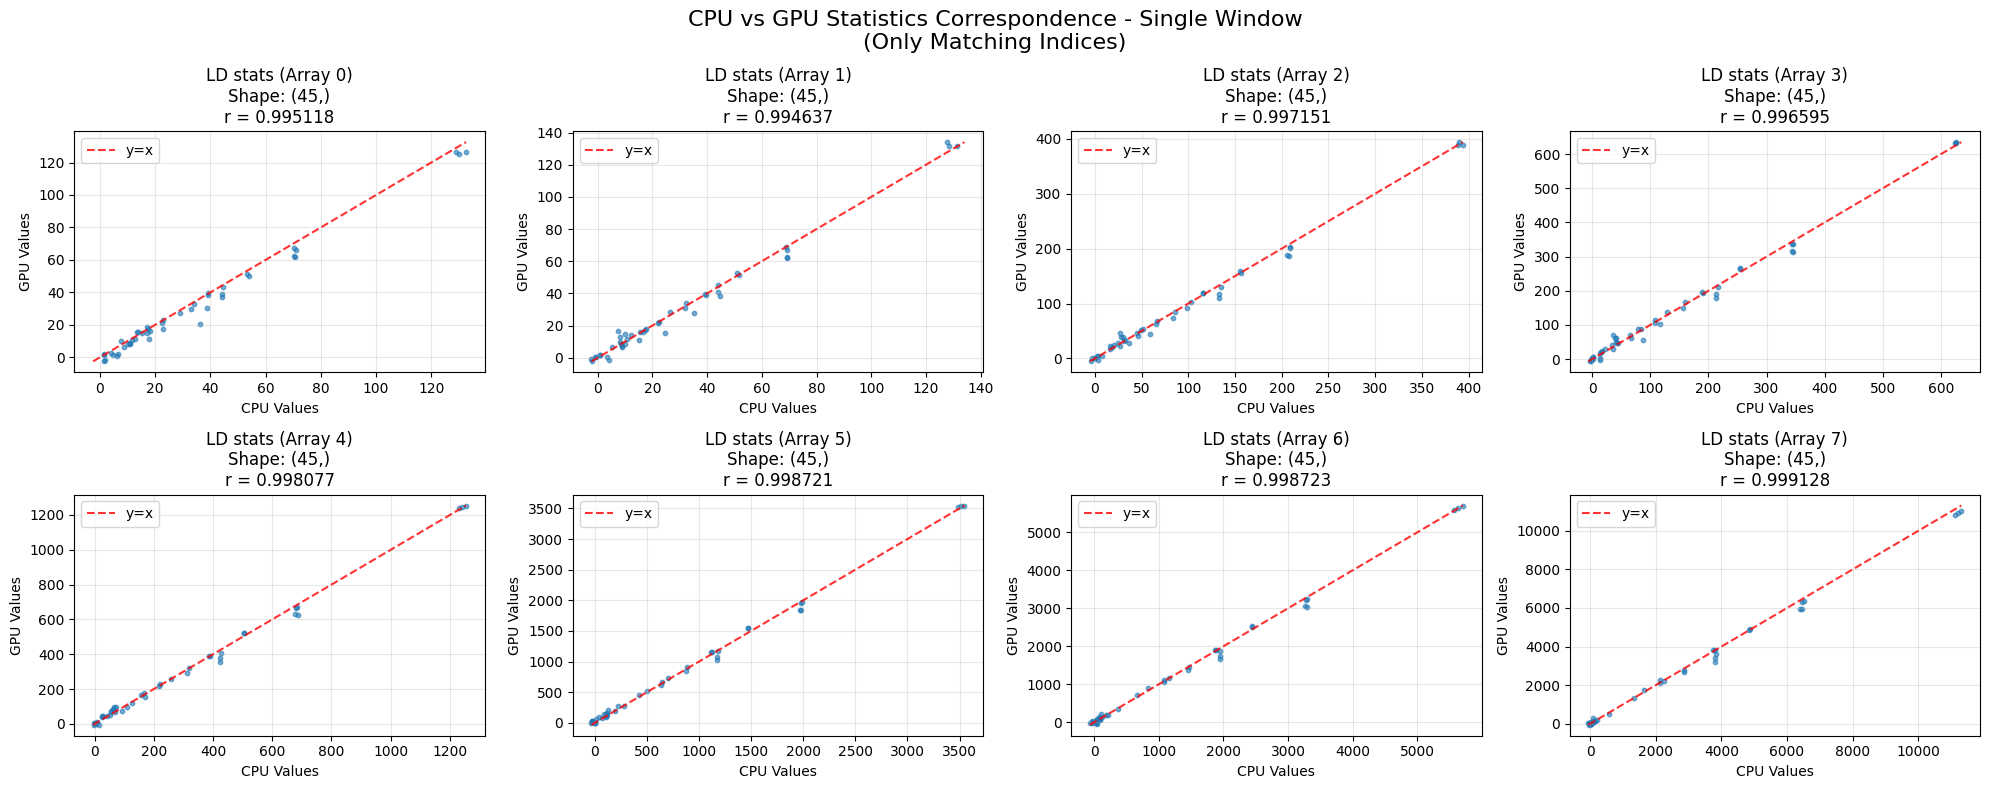


=== SINGLE WINDOW SUMMARY (MATCHING INDICES ONLY) ===
Overall correlation: 0.99936783
Overall MSE: 5.64e+04
Overall MAE: 8.22e+01
Total data points: 456
=== LOADING AND COMPARING 51 WINDOWS (MATCHING INDICES ONLY) ===
Window 0: correlation = 0.999974, 456 data points
Window 4: correlation = 0.999974, 456 data points
Window 6: correlation = 0.999981, 456 data points
Window 8: correlation = 0.999986, 456 data points
Window 9: correlation = 0.999984, 456 data points
Window 10: correlation = 0.999980, 456 data points
Window 13: correlation = 0.999984, 456 data points
Window 14: correlation = 0.999978, 456 data points
Window 19: correlation = 0.999985, 456 data points
Window 21: correlation = 0.999985, 456 data points
Window 24: correlation = 0.999994, 456 data points
Window 25: correlation = 0.999967, 456 data points
Window 28: correlation = 0.999987, 456 data points
Window 29: correlation = 0.999989, 456 data points
Window 30: correlation = 0.999978, 456 data points
Window 33: correlatio

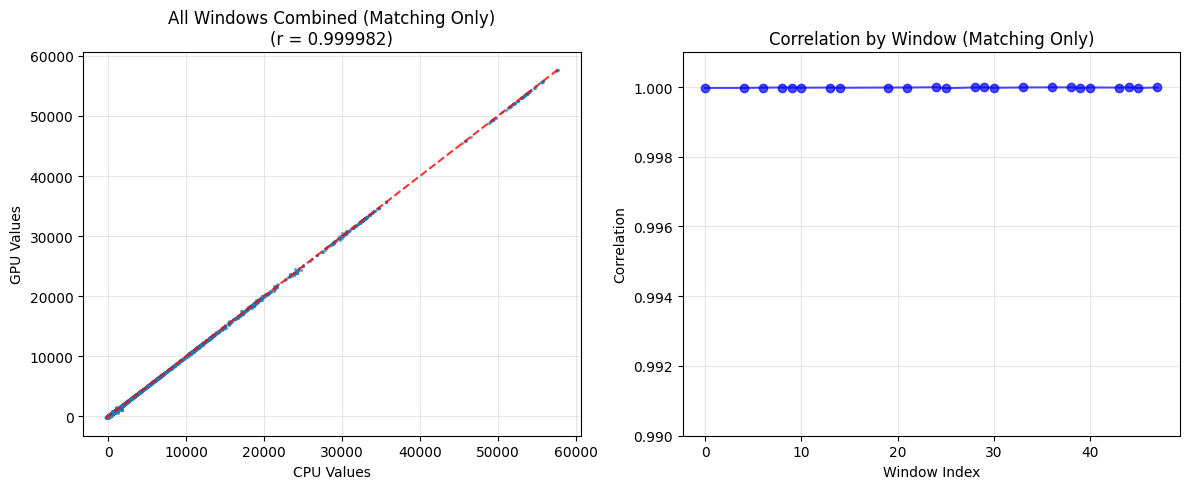

In [20]:
# Create scatter plots to compare CPU vs GPU statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def plot_cpu_vs_gpu_correspondence(cpu_data, gpu_data, title_suffix=""):
    """Plot CPU vs GPU statistics to assess correspondence, only comparing matching statistics."""
    
    # Extract statistics arrays and names from both datasets
    cpu_sums = cpu_data['sums']
    gpu_sums = gpu_data['sums']
    cpu_stats = cpu_data.get('stats', [])
    gpu_stats = gpu_data.get('stats', [])
    
    print(f"CPU has {len(cpu_sums)} sum arrays, {len(cpu_stats)} stat groups")
    print(f"GPU has {len(gpu_sums)} sum arrays, {len(gpu_stats)} stat groups")
    
    # Check if both datasets have the same statistic names
    if cpu_stats and gpu_stats:
        cpu_stat_names = []
        gpu_stat_names = []
        
        # Flatten the stat names from both datasets
        for group in cpu_stats:
            if isinstance(group, list):
                cpu_stat_names.extend(group)
            else:
                cpu_stat_names.append(group)
                
        for group in gpu_stats:
            if isinstance(group, list):
                gpu_stat_names.extend(group)
            else:
                gpu_stat_names.append(group)
        
        print(f"CPU statistics ({len(cpu_stat_names)}): {cpu_stat_names[:5]}..." if len(cpu_stat_names) > 5 else f"CPU statistics: {cpu_stat_names}")
        print(f"GPU statistics ({len(gpu_stat_names)}): {gpu_stat_names[:5]}..." if len(gpu_stat_names) > 5 else f"GPU statistics: {gpu_stat_names}")
        
        # Find common statistics
        common_stats = []
        for i, stat in enumerate(cpu_stat_names):
            if i < len(gpu_stat_names) and gpu_stat_names[i] == stat:
                common_stats.append((i, stat))
        
        print(f"Found {len(common_stats)} matching statistics")
        if len(common_stats) > 0:
            print(f"First few matches: {[stat for _, stat in common_stats[:5]]}")
    
    # Compare sum arrays that have matching shapes and are within valid range
    valid_comparisons = []
    min_arrays = min(len(cpu_sums), len(gpu_sums))
    
    for i in range(min_arrays):
        cpu_vals = cpu_sums[i]
        gpu_vals = gpu_sums[i]
        
        if cpu_vals.shape == gpu_vals.shape:
            valid_comparisons.append(i)
    
    print(f"Found {len(valid_comparisons)} arrays with matching shapes for comparison")
    
    if len(valid_comparisons) == 0:
        print("❌ No matching arrays found for comparison")
        return
    
    # Create subplots for valid comparisons
    n_plots = min(len(valid_comparisons), 8)  # Limit to 8 plots for visibility
    n_cols = min(4, n_plots)
    n_rows = int(np.ceil(n_plots / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    print(f"Creating {n_plots} comparison plots for {title_suffix}")
    
    for plot_idx in range(n_plots):
        array_idx = valid_comparisons[plot_idx]
        ax = axes[plot_idx] if n_plots > 1 else axes
        
        cpu_vals = cpu_sums[array_idx]
        gpu_vals = gpu_sums[array_idx]
        
        # Flatten arrays for scatter plot
        cpu_flat = cpu_vals.flatten()
        gpu_flat = gpu_vals.flatten()
        
        # Create scatter plot
        ax.scatter(cpu_flat, gpu_flat, alpha=0.6, s=10)
        
        # Add perfect correspondence line
        min_val = min(np.min(cpu_flat), np.min(gpu_flat))
        max_val = max(np.max(cpu_flat), np.max(gpu_flat))
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='y=x')
        
        # Calculate correlation
        if len(cpu_flat) > 1:
            try:
                corr, p_val = pearsonr(cpu_flat, gpu_flat)
                
                # Add array type info
                array_type = "LD stats" if cpu_vals.shape[0] > 10 else "H stats" if cpu_vals.shape[0] == 6 else f"Array {array_idx}"
                ax.set_title(f'{array_type} (Array {array_idx})\nShape: {cpu_vals.shape}\nr = {corr:.6f}')
            except:
                ax.set_title(f'Array {array_idx}\nShape: {cpu_vals.shape}')
        else:
            ax.set_title(f'Array {array_idx}\nShape: {cpu_vals.shape}')
            
        ax.set_xlabel('CPU Values')
        ax.set_ylabel('GPU Values')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Print summary statistics
        mse = np.mean((cpu_flat - gpu_flat)**2)
        mae = np.mean(np.abs(cpu_flat - gpu_flat))
        max_diff = np.max(np.abs(cpu_flat - gpu_flat))
        
        print(f"\nArray {array_idx} ({cpu_vals.shape}):")
        print(f"  MSE: {mse:.2e}")
        print(f"  MAE: {mae:.2e}")
        print(f"  Max abs diff: {max_diff:.2e}")
        if len(cpu_flat) > 1:
            print(f"  Correlation: {corr:.6f}")
    
    # Remove empty subplots
    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])
    
    plt.suptitle(f'CPU vs GPU Statistics Correspondence {title_suffix}\n(Only Matching Indices)', fontsize=16)
    plt.tight_layout()
    plt.show()

def load_and_compare_multiple_windows(n_windows=5):
    """Load and compare statistics from multiple windows, only using matching indices."""
    
    print(f"=== LOADING AND COMPARING {n_windows} WINDOWS (MATCHING INDICES ONLY) ===")
    
    all_cpu_vals = []
    all_gpu_vals = []
    all_correlations = []
    window_indices = []
    
    # Load multiple windows
    for i in range(min(n_windows, 100)):  # Limit to available windows
        try:
            # Load CPU data
            cpu_file = f"{base_dir}/experiments/OOA_three_pop/inferences/sim_0/MomentsLD/traditional/LD_stats/LD_stats_window_{i}.pkl"
            gpu_file = f"{base_dir}/experiments/OOA_three_pop/inferences/sim_0/MomentsLD/LD_stats/LD_stats_window_{i}.pkl"
            
            if os.path.exists(cpu_file) and os.path.exists(gpu_file):
                with open(cpu_file, 'rb') as f:
                    cpu_data = pickle.load(f)
                with open(gpu_file, 'rb') as f:
                    gpu_data = pickle.load(f)
                
                # Extract statistics only from matching indices
                window_cpu = []
                window_gpu = []
                
                min_arrays = min(len(cpu_data['sums']), len(gpu_data['sums']))
                for j in range(min_arrays):
                    if cpu_data['sums'][j].shape == gpu_data['sums'][j].shape:
                        window_cpu.extend(cpu_data['sums'][j].flatten())
                        window_gpu.extend(gpu_data['sums'][j].flatten())
                
                if window_cpu and window_gpu:
                    all_cpu_vals.extend(window_cpu)
                    all_gpu_vals.extend(window_gpu)
                    
                    # Calculate correlation for this window
                    window_cpu = np.array(window_cpu)
                    window_gpu = np.array(window_gpu)
                    corr, _ = pearsonr(window_cpu, window_gpu)
                    all_correlations.append(corr)
                    window_indices.append(i)
                    
                    print(f"Window {i}: correlation = {corr:.6f}, {len(window_cpu)} data points")
        except Exception as e:
            print(f"Error loading window {i}: {e}")
    
    # Overall statistics
    if all_cpu_vals:
        all_cpu_vals = np.array(all_cpu_vals)
        all_gpu_vals = np.array(all_gpu_vals)
        
        overall_corr, _ = pearsonr(all_cpu_vals, all_gpu_vals)
        overall_mse = np.mean((all_cpu_vals - all_gpu_vals)**2)
        overall_mae = np.mean(np.abs(all_cpu_vals - all_gpu_vals))
        
        print(f"\n=== MULTI-WINDOW SUMMARY (MATCHING INDICES) ===")
        print(f"Windows loaded: {len(window_indices)}")
        print(f"Overall correlation: {overall_corr:.8f}")
        print(f"Mean correlation: {np.mean(all_correlations):.8f}")
        print(f"Min correlation: {np.min(all_correlations):.8f}")
        print(f"Max correlation: {np.max(all_correlations):.8f}")
        print(f"Overall MSE: {overall_mse:.2e}")
        print(f"Overall MAE: {overall_mae:.2e}")
        print(f"Total data points: {len(all_cpu_vals)}")
        
        # Create overall scatter plot
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Scatter plot (sample for performance)
        sample_size = min(10000, len(all_cpu_vals))
        indices = np.random.choice(len(all_cpu_vals), sample_size, replace=False)
        sample_cpu = all_cpu_vals[indices]
        sample_gpu = all_gpu_vals[indices]
        
        axes[0].scatter(sample_cpu, sample_gpu, alpha=0.5, s=2)
        min_val = min(np.min(sample_cpu), np.min(sample_gpu))
        max_val = max(np.max(sample_cpu), np.max(sample_gpu))
        axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
        axes[0].set_xlabel('CPU Values')
        axes[0].set_ylabel('GPU Values')
        axes[0].set_title(f'All Windows Combined (Matching Only)\n(r = {overall_corr:.6f})')
        axes[0].grid(True, alpha=0.3)
        
        # Correlation per window
        axes[1].plot(window_indices, all_correlations, 'bo-', alpha=0.7)
        axes[1].set_xlabel('Window Index')
        axes[1].set_ylabel('Correlation')
        axes[1].set_title('Correlation by Window (Matching Only)')
        axes[1].grid(True, alpha=0.3)
        axes[1].set_ylim([0.99, 1.001])
        
        plt.tight_layout()
        plt.show()
        
        return overall_corr, overall_mse, all_correlations
    else:
        print("No data loaded for comparison")
        return None, None, []

# First plot the single window we loaded with matching indices only
plot_cpu_vs_gpu_correspondence(cpu_stats, gpu_stats, "- Single Window")

# Calculate overall statistics across matching arrays only for single window
print(f"\n=== SINGLE WINDOW SUMMARY (MATCHING INDICES ONLY) ===")
all_cpu_vals = []
all_gpu_vals = []

min_arrays = min(len(cpu_stats['sums']), len(gpu_stats['sums']))
for i in range(min_arrays):
    if cpu_stats['sums'][i].shape == gpu_stats['sums'][i].shape:
        all_cpu_vals.extend(cpu_stats['sums'][i].flatten())
        all_gpu_vals.extend(gpu_stats['sums'][i].flatten())

if all_cpu_vals:
    all_cpu_vals = np.array(all_cpu_vals)
    all_gpu_vals = np.array(all_gpu_vals)
    
    overall_corr, _ = pearsonr(all_cpu_vals, all_gpu_vals)
    overall_mse = np.mean((all_cpu_vals - all_gpu_vals)**2)
    overall_mae = np.mean(np.abs(all_cpu_vals - all_gpu_vals))
    
    print(f"Overall correlation: {overall_corr:.8f}")
    print(f"Overall MSE: {overall_mse:.2e}")
    print(f"Overall MAE: {overall_mae:.2e}")
    print(f"Total data points: {len(all_cpu_vals)}")

# Now load and compare multiple windows with matching indices only
corr, mse, window_corrs = load_and_compare_multiple_windows(51)

=== COMPREHENSIVE DATA AVAILABILITY CHECK ===
GPU directory has 100 files
CPU directory has 51 files
GPU windows: 100 total
  Window range: 0 to 99
  First 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Last 10: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
CPU windows: 51 total
  Window range: 0 to 99
  First 10: [0, 4, 6, 8, 9, 10, 13, 14, 19, 21]
  Last 10: [85, 86, 88, 89, 92, 93, 94, 96, 98, 99]

Common windows: 51 total
  Range: 0 to 99
  First 10: [0, 4, 6, 8, 9, 10, 13, 14, 19, 21]
  Last 10: [85, 86, 88, 89, 92, 93, 94, 96, 98, 99]

GPU-only windows (49): [1, 2, 3, 5, 7, 11, 12, 15, 16, 17, 18, 20, 22, 23, 26, 27, 31, 32, 34, 35, 37, 41, 42, 46, 48, 49, 50, 52, 56, 57, 61, 62, 65, 67, 71, 72, 75, 76, 77, 78, 79, 80, 82, 83, 87, 90, 91, 95, 97]

📊 CURRENT ANALYSIS STATUS:
  • We analyzed: 10 windows (limited by function call)
  • Available for analysis: 51 windows
  • Percentage analyzed: 19.6% of available data

💡 TO ANALYZE ALL AVAILABLE DATA:
  • Change function call to: load_and_compare_m